In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [3]:
np.random.seed(42)

In [4]:
digits = load_digits()

In [5]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [6]:
digits.data.shape

(1797, 64)

In [7]:
digits.images.shape

(1797, 8, 8)

In [8]:
data = scale(digits.data)

In [9]:
n_samples,n_features = data.shape

In [10]:
n_digits = len(np.unique(digits.target))

In [11]:
labels = digits.target

In [12]:
sample_size = 300

In [13]:
def bench_k_means(estimator,name,data):
    t0 = time()
    estimator.fit(data)
    print('%9s    %.2fs     %i    %.3f    %.3f     %.3f     %.3f     %.3f      %.3f'
          %(name,(time()-t0),estimator.inertia_,
            metrics.homogeneity_score(labels,estimator.labels_),
            metrics.completeness_score(labels,estimator.labels_),
            metrics.v_measure_score(labels,estimator.labels_),
            metrics.adjusted_rand_score(labels,estimator.labels_),
            metrics.adjusted_mutual_info_score(labels,estimator.labels_),
            metrics.silhouette_score(data,estimator.labels_,metric='euclidean',sample_size=sample_size)))

In [14]:
data.shape

(1797, 64)

In [15]:
pca = PCA(n_components=10)

In [16]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pca.transform(data).shape

(1797, 10)

In [17]:
pca.components_

array([[  9.79117227e-18,  -1.82232981e-01,  -2.85868566e-01,
         -2.20370861e-01,   2.51692405e-02,   9.49797615e-03,
          5.24757341e-02,   6.26918891e-02,  -3.47082827e-02,
         -2.45533593e-01,  -2.29151181e-01,   1.07943596e-01,
         -3.62043886e-02,  -3.87105147e-02,   8.37818635e-02,
          9.27742512e-02,  -1.66992157e-02,  -1.36715761e-01,
          6.30532691e-02,   1.22879302e-01,  -1.48193705e-01,
          2.34858019e-02,   1.71200322e-01,   1.04210666e-01,
          3.94856638e-03,   1.16389323e-01,   1.88204747e-01,
         -6.58612193e-02,  -1.43530934e-01,   1.28207616e-01,
          1.80618678e-01,   5.27126154e-02,   0.00000000e+00,
          2.38901815e-01,   2.35003507e-01,   5.08917209e-03,
          1.31097234e-02,   1.59116304e-01,   1.29393480e-01,
          0.00000000e+00,   5.56008651e-02,   1.87158953e-01,
          1.53533907e-01,   4.68272848e-02,   1.10894644e-01,
          1.07209862e-01,  -1.79258630e-02,   2.27516291e-03,
        

In [69]:
print("n_digits: %d, \t n_samples %d, \t n_features %d"  % (n_digits,n_samples,n_features))
print(89*'_')
print('% 9s' % 'init         time    inertia    homo    compl   v-meas        ARI     AMI     silhouette')
bench_k_means(KMeans(init='k-means++',n_clusters=n_digits,n_init=10),name='k-means++',data=data)
bench_k_means(KMeans(init='random',n_clusters=n_digits,n_init=10),name='random',data=data)
# in this case the seeding of the centers is deterministic, hence we run the kmeans algorithm only once with n_init=1
bench_k_means(KMeans(init=pca.components_,n_clusters=n_digits,n_init=1),name='PCA-based',data=data)
print(89*'_')

n_digits: 10, 	 n_samples 1797, 	 n_features 64
_________________________________________________________________________________________
init         time    inertia    homo    compl   v-meas        ARI     AMI     silhouette
k-means++    0.26s     69870    0.639    0.679     0.658     0.527     0.635      0.138
   random    0.17s     69685    0.668    0.710     0.688     0.549     0.664      0.145
PCA-based    0.05s     70768    0.668    0.695     0.681     0.558     0.665      0.122
_________________________________________________________________________________________


###### Visualize the results on PCA-reduced data

In [70]:
reduced_data = PCA(n_components=2).fit_transform(data)

In [71]:
kmeans = KMeans(init='k-means++',n_clusters=n_digits,n_init=10)

In [72]:
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [73]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

In [86]:
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [87]:
xx,yy

(array([[ -7.99721121,  -7.97721121,  -7.95721121, ...,  10.92278879,
          10.94278879,  10.96278879],
        [ -7.99721121,  -7.97721121,  -7.95721121, ...,  10.92278879,
          10.94278879,  10.96278879],
        [ -7.99721121,  -7.97721121,  -7.95721121, ...,  10.92278879,
          10.94278879,  10.96278879],
        ..., 
        [ -7.99721121,  -7.97721121,  -7.95721121, ...,  10.92278879,
          10.94278879,  10.96278879],
        [ -7.99721121,  -7.97721121,  -7.95721121, ...,  10.92278879,
          10.94278879,  10.96278879],
        [ -7.99721121,  -7.97721121,  -7.95721121, ...,  10.92278879,
          10.94278879,  10.96278879]]),
 array([[ -7.67548145,  -7.67548145,  -7.67548145, ...,  -7.67548145,
          -7.67548145,  -7.67548145],
        [ -7.65548145,  -7.65548145,  -7.65548145, ...,  -7.65548145,
          -7.65548145,  -7.65548145],
        [ -7.63548145,  -7.63548145,  -7.63548145, ...,  -7.63548145,
          -7.63548145,  -7.63548145],
        ...,

In [77]:
#x = np.arange(-5, 5, 0.1)
#y = np.arange(-5, 5, 0.1)
#xx, yy = np.meshgrid(x, y)

In [84]:
#xx,yy

(array([[-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
        [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
        [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
        ..., 
        [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
        [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
        [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9]]),
 array([[-5. , -5. , -5. , ..., -5. , -5. , -5. ],
        [-4.9, -4.9, -4.9, ..., -4.9, -4.9, -4.9],
        [-4.8, -4.8, -4.8, ..., -4.8, -4.8, -4.8],
        ..., 
        [ 4.7,  4.7,  4.7, ...,  4.7,  4.7,  4.7],
        [ 4.8,  4.8,  4.8, ...,  4.8,  4.8,  4.8],
        [ 4.9,  4.9,  4.9, ...,  4.9,  4.9,  4.9]]))

In [88]:
xx.ravel()

array([ -7.99721121,  -7.97721121,  -7.95721121, ...,  10.92278879,
        10.94278879,  10.96278879])

In [89]:
yy.ravel()

array([ -7.67548145,  -7.67548145,  -7.67548145, ...,  10.84451855,
        10.84451855,  10.84451855])

In [111]:
np.c_[xx.ravel(),yy.ravel()]

array([[ -7.99721121,  -7.67548145],
       [ -7.97721121,  -7.67548145],
       [ -7.95721121,  -7.67548145],
       ..., 
       [ 10.92278879,  10.84451855],
       [ 10.94278879,  10.84451855],
       [ 10.96278879,  10.84451855]])

In [116]:
# Obtain labels for each point in mesh. Use last trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

In [115]:
#np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [117]:
xx.shape

(927, 949)

In [121]:
Z.shape

(879723,)

In [122]:
Z

array([4, 4, 4, ..., 5, 5, 5])

In [124]:
Z = Z.reshape(xx.shape)

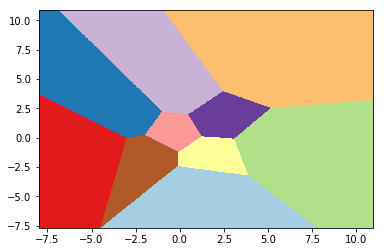

In [126]:
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.show()

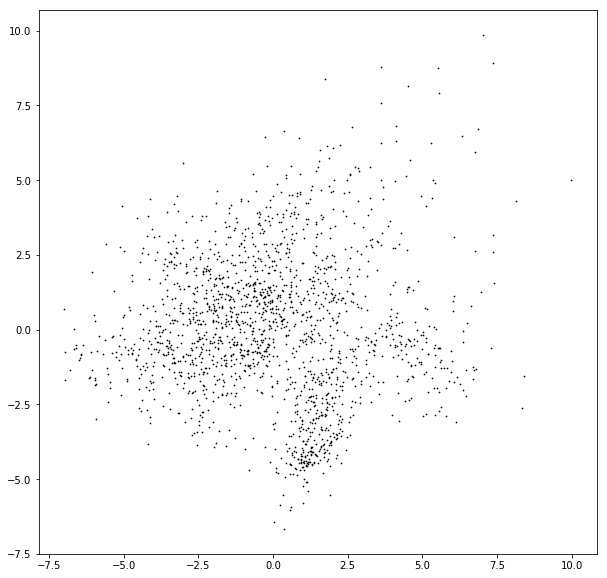

In [110]:
plt.figure(figsize=(10,10))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],s=2,c='k',marker='.')
plt.show()

In [127]:
centroids = kmeans.cluster_centers_

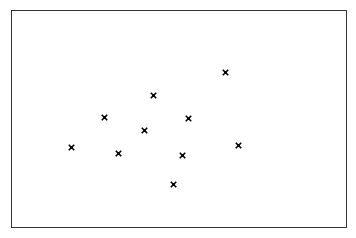

In [135]:
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=30,linewidths=3,color='k',zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [47]:
kmeans = KMeans(n_clusters=10).fit(data)

In [48]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
kmeans.labels_

array([1, 0, 0, ..., 0, 6, 6])

In [43]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [46]:
kmeans.cluster_centers_

array([[  0.00000000e+00,   1.26454335e+00,   1.19099772e+00,
          4.29915423e-01,   5.41490529e-01,   1.23068990e+00,
          9.69137523e-01,  -9.10710716e-02,   1.65209140e-01,
          9.93698318e-01,   8.49383159e-01,   3.40697533e-03,
         -3.16176176e-01,  -9.65580448e-02,   1.99973506e-01,
         -8.78914928e-02,  -4.46250733e-02,   9.84016502e-01,
          6.82973324e-01,  -2.22122037e-01,  -6.93396941e-01,
         -1.00537187e+00,  -5.03426812e-01,  -1.14221844e-01,
         -3.33797263e-02,   7.97671739e-01,   7.13336762e-01,
          5.69201619e-01,  -2.76689958e-01,  -8.54425243e-01,
         -5.63927449e-01,  -4.72323823e-02,   0.00000000e+00,
         -1.80544449e-01,  -1.94428492e-03,   1.42500838e-01,
         -3.77874402e-02,  -6.42729233e-01,  -6.59398116e-01,
          0.00000000e+00,  -6.13436689e-02,  -4.24976534e-01,
         -7.82398658e-01,  -3.06640397e-01,   4.16995005e-01,
         -2.93843020e-01,  -6.73033142e-01,  -8.87416172e-02,
        

In [53]:
kmeans.inertia_

69477.887025993259

In [58]:
for i in range(8,16,1):
    kmeans = KMeans(n_clusters=i)
    s = kmeans.fit(data)
    print (i ,kmeans.inertia_)

8 74562.7759377
9 72493.1388015
10 69406.4859409
11 67294.5512778
12 65095.4097741
13 63169.1830131
14 61231.9227806
15 59787.0711511
